SP23-BAI-046

Noor Fatima

Task 1: Implement a Perceptron from Scratch

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Perceptron Class
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  # Including bias
        self.lr = lr
        self.epochs = epochs
        self.losses = []  # Tracking training loss

    # Step activation function
    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
      X = np.insert(X, 0, 1, axis=1)  # Add bias term
      return np.array([self.activation(np.dot(self.weights, x)) for x in X])

    def train(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.activation(np.dot(self.weights, xi))
                error = target - prediction
                self.weights += self.lr * error * xi  # Update weights (including bias)
                errors += int(error != 0)
            self.losses.append(errors)  # Store loss history
        return self.losses

In [56]:
# Define input and output for AND, OR, XOR gates
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# Train Perceptron for AND gate
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X, y_and)
print("AND Gate Weights:", perceptron_and.weights)

# Train Perceptron for OR gate
perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X, y_or)
print("OR Gate Weights:", perceptron_or.weights)

# Train Perceptron for XOR gate
perceptron_xor = Perceptron(input_size=2)
perceptron_xor.train(X, y_xor)
print("XOR Gate Weights:", perceptron_xor.weights)

AND Gate Weights: [-0.24834348  0.23974347  0.05843371]
OR Gate Weights: [-0.09615754  0.19527941  0.93825798]
XOR Gate Weights: [ 0.0860088  -0.15842091 -0.08950241]


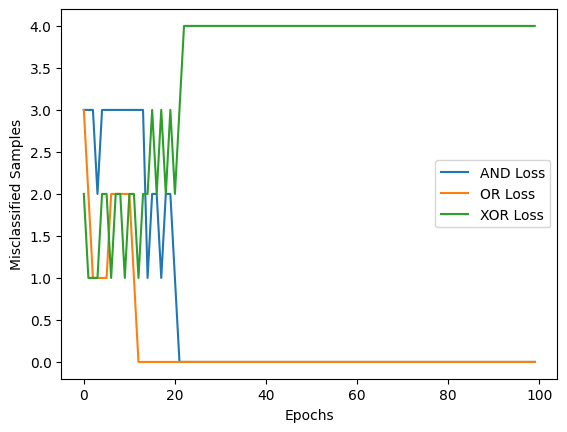

In [33]:
# Plot training loss for AND, OR, XOR
plt.plot(perceptron_and.losses, label="AND Loss")
plt.plot(perceptron_or.losses, label="OR Loss")
plt.plot(perceptron_xor.losses, label="XOR Loss")
plt.xlabel("Epochs")
plt.ylabel("Misclassified Samples")
plt.legend()
plt.show()

Task 2: Perceptron for Binary Classification

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [38]:
# Load Iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [39]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [40]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
# Select only Setosa (0) and Versicolor (1)
df = df[df['target'] != 2]

In [43]:
# Extract features (sepal length and petal length) and target
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = df['target'].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train Perceptron
perceptron_iris = Perceptron(input_size=2, epochs=100)
perceptron_iris.train(X_train, y_train)


[8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

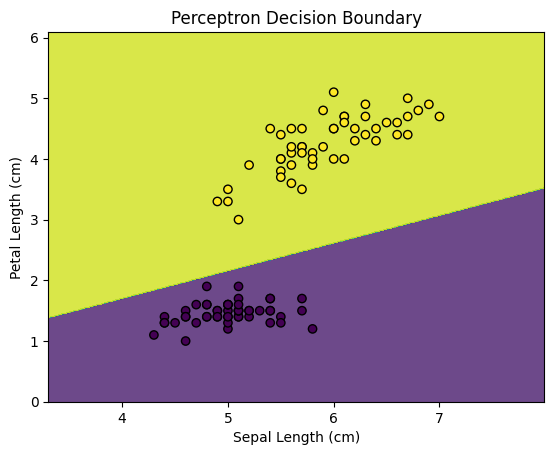

In [47]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Reshape the input to the predict method to have 2 dimensions
Z = perceptron_iris.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Perceptron Decision Boundary")
plt.show()

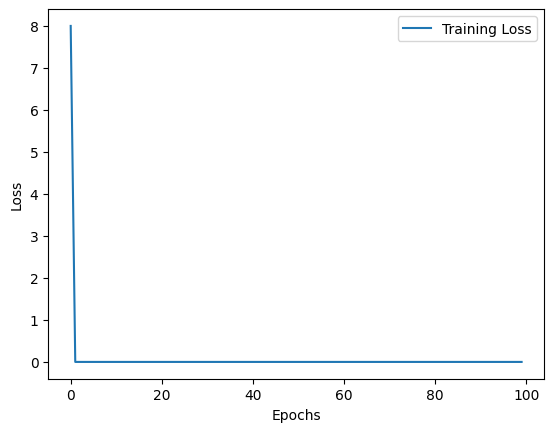

In [48]:
# Plot training loss
plt.plot(perceptron_iris.losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Task 3: Real-World Problem - Handwritten Digit Classification

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [50]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
# Select only digits 0 and 1
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]
X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

In [52]:
# Flatten images and normalize pixel values
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [53]:
# Train Perceptron
perceptron_mnist = Perceptron(input_size=X_train.shape[1], epochs=50)
perceptron_mnist.train(X_train, y_train)

<ipython-input-30-2ce066865e1e>:23: RuntimeWarning: overflow encountered in scalar subtract
  error = target - prediction


[5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923,
 5923]

In [63]:
# Evaluate accuracy
y_pred = [perceptron_mnist.predict(x.reshape(1, -1)) for x in X_test]
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5366430260047281


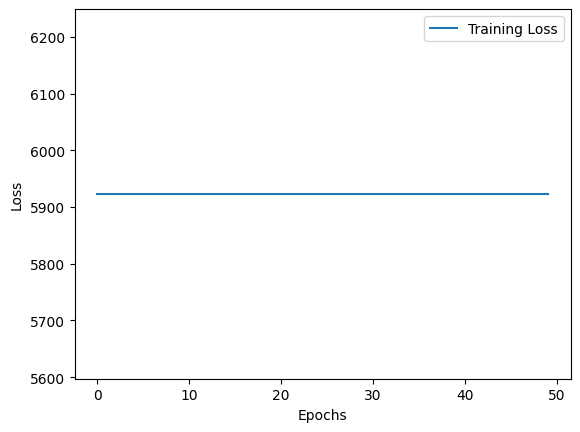

In [65]:
# Plot training loss
plt.plot(perceptron_mnist.losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()